In [1]:
#load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(10.0,8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,ID,Item_ID,Datetime,Category_3,Category_2,Category_1,Price,Number_Of_Sales
0,30495_20140101,30495,2014-01-01,0,2.0,90,165.123,1
1,30375_20140101,30375,2014-01-01,0,2.0,307,68.666,5
2,30011_20140101,30011,2014-01-01,0,3.0,67,253.314,2
3,30864_20140101,30864,2014-01-01,0,2.0,315,223.122,1
4,30780_20140101,30780,2014-01-01,1,2.0,132,28.750,1


In [4]:
print("Shape of train :",train.shape)
print("Shape of test :",test.shape)

Shape of train : (881876, 8)
Shape of test : (266248, 6)


In [5]:
#check missing values
#test.info()
missing = train.isnull().sum()/len(train)
missing=missing[missing>0]
missing.sort_values(inplace=True)
missing

Category_2    0.103884
dtype: float64

In [6]:
#Kind of values in Category_2
train['Category_2'].value_counts()

2.0    227166
3.0    212388
1.0    140098
4.0    106903
5.0    103708
Name: Category_2, dtype: int64

In [7]:
sns.set(style="whitegrid",color_codes=True)

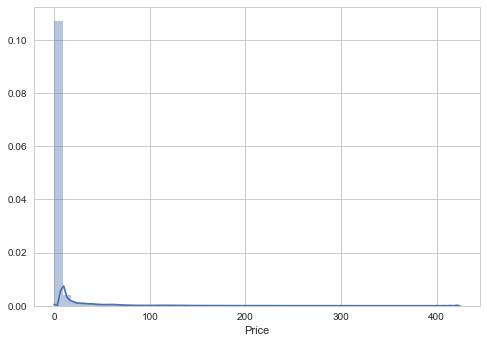

In [8]:
sns.distplot(train['Price'])

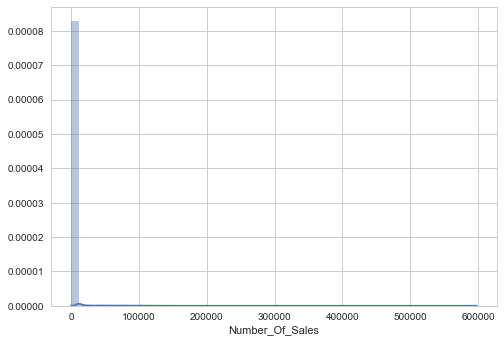

In [9]:
sns.distplot(train['Number_Of_Sales'])

In [10]:
pivot=train.pivot_table(index='Category_2',values=['Price','Number_Of_Sales'],aggfunc=np.median)
pivot.sort_values(by='Price',ascending=False)

,Number_Of_Sales,Price
Category_2,,
1.0,172,0.876
3.0,337,0.664
2.0,418,0.374
4.0,160,0.240
5.0,172,0.205


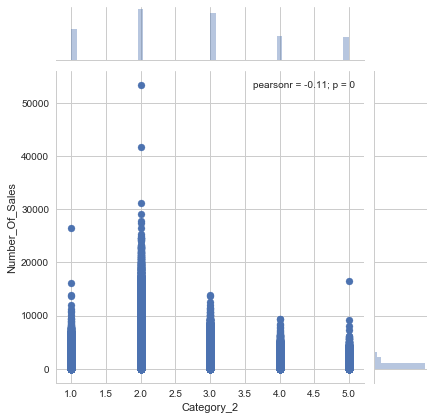

In [11]:
sns.jointplot(x=train['Category_2'],y=train['Number_Of_Sales'])


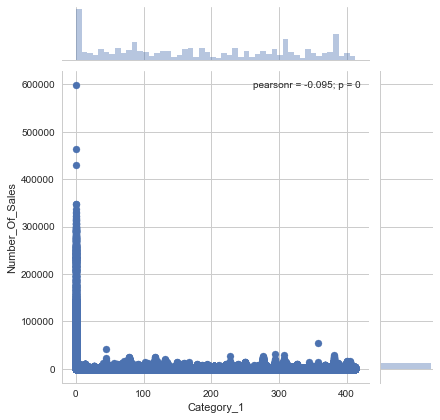

In [12]:
sns.jointplot(x=train['Category_1'],y=train['Number_Of_Sales'])

In [13]:
train['Category_3'].value_counts()

0    738566
1    143310
Name: Category_3, dtype: int64

In [14]:
sp_pivot=train.pivot_table(index='Item_ID',values='Price',aggfunc=np.median)
sp_pivot.sort_values(by='Price',ascending=False)

,Price
Item_ID,
30011,296.7200
30408,226.3080
30120,203.3965
30082,182.9840
30413,171.7225
30207,155.3670
29888,152.0585
30801,143.1780
30945,137.4425


# PreProcessing

In [15]:
alldata=train.append(test)

In [16]:
alldata.shape

(1148124, 8)

In [17]:
del alldata['ID']

In [18]:
alldata['Category_2'].fillna(0,inplace=True)
pivot=alldata.pivot_table(index='Category_2',values=['Price','Number_Of_Sales'],aggfunc=np.median)
pivot.sort_values(by='Price',ascending=False)

,Number_Of_Sales,Price
Category_2,,
0.0,140.0,1.122
1.0,172.0,0.876
3.0,337.0,0.664
2.0,418.0,0.374
4.0,160.0,0.240
5.0,172.0,0.205


In [19]:
pivot.sort_values(by='Number_Of_Sales',ascending=False)

,Number_Of_Sales,Price
Category_2,,
2.0,418.0,0.374
3.0,337.0,0.664
1.0,172.0,0.876
5.0,172.0,0.205
4.0,160.0,0.240
0.0,140.0,1.122


In [20]:
dict_C2_Price={0:5,1:4,3:3,2:2,4:1,5:0}
dict_C2_NOS={2:5,3:4,5:3,1:2,4:1,0:0}

alldata['Cat_2_Price']=alldata['Category_2'].map(dict_C2_Price)
alldata['Cat_2_NOS']=alldata['Category_2'].map(dict_C2_NOS)

del alldata['Category_2']

alldata[['Cat_2_Price','Cat_2_NOS']].head()


,Cat_2_Price,Cat_2_NOS
0,2,5
1,2,5
2,3,4
3,2,5
4,2,5


In [21]:
timestamps=[]
for x in pd.to_datetime(alldata['Datetime']):
    timestamps.append(x.timestamp())

alldata['timestamps']=timestamps
alldata.drop('Datetime',inplace=True,axis=1)
alldata.head()

,Category_1,Category_3,Item_ID,Number_Of_Sales,Price,Cat_2_Price,Cat_2_NOS,timestamps
0,90,0,30495,1.0,165.123,2,5,1.388515e+09
1,307,0,30375,5.0,68.666,2,5,1.388515e+09
2,67,0,30011,2.0,253.314,3,4,1.388515e+09
3,315,0,30864,1.0,223.122,2,5,1.388515e+09
4,132,1,30780,1.0,28.750,2,5,1.388515e+09


In [22]:
train_new_price=alldata[alldata['Price'].notnull()].drop(['Cat_2_NOS','Number_Of_Sales'],axis=1)
train_new_NOS=alldata[alldata['Number_Of_Sales'].notnull()].drop(['Cat_2_Price','Price'],axis=1)
test_new_price=alldata[alldata['Price'].isnull()].drop(['Cat_2_NOS','Number_Of_Sales','Price'],axis=1)
test_new_NOS=alldata[alldata['Number_Of_Sales'].isnull()].drop(['Cat_2_Price','Price','Number_Of_Sales'],axis=1)

In [28]:
train_new_price.columns

Index(['Category_1', 'Category_3', 'Item_ID', 'Price', 'Cat_2_Price',
       'timestamps'],
      dtype='object')

In [29]:
from scipy.stats import skew
del train_new_price['Price']

skewed = train_new_price[train_new_price.columns].apply(lambda x: skew(x.astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
train_new_price[skewed] = np.log1p(train_new_price[skewed])
test_new_price[skewed] = np.log1p(test_new_price[skewed])


In [30]:
del train_new_NOS['Number_Of_Sales']
nosskewed = train_new_NOS[train_new_NOS.columns].apply(lambda x: skew(x.astype(float)))
nosskewed = nosskewed[nosskewed > 0.75]
nosskewed = nosskewed.index
train_new_NOS[nosskewed] = np.log1p(train_new_NOS[nosskewed])
test_new_NOS[nosskewed] = np.log1p(test_new_NOS[nosskewed])


In [31]:
test_new_price.head()

,Category_1,Category_3,Item_ID,Cat_2_Price,timestamps
0,235,0.0,30413,3,1.467311e+09
1,235,0.0,30413,3,1.467398e+09
2,235,0.0,30413,3,1.467484e+09
3,235,0.0,30413,3,1.467571e+09
4,235,0.0,30413,3,1.467657e+09


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_new_price[train_new_price.columns])
scaled = scaler.transform(train_new_price[train_new_price.columns])

for i,col in enumerate(train_new_price.columns):
    train_new_price[col] = scaled[:,i]
    
#train_new_price.columns.remove('Price')
scaled = scaler.fit_transform(test_new_price[test_new_price.columns])

for i, col in enumerate(test_new_price.columns):
      test_new_price[col] = scaled[:,i]

In [33]:
nosscaler = StandardScaler()
nosscaler.fit(train_new_NOS[train_new_NOS.columns])
nosscaled = nosscaler.transform(train_new_NOS[train_new_NOS.columns])

for i,col in enumerate(train_new_NOS.columns):
    train_new_NOS[col] = nosscaled[:,i]
    
#train_new_price.columns.remove('Price')
nosscaled = nosscaler.fit_transform(test_new_NOS[test_new_NOS.columns])

for i, col in enumerate(test_new_NOS.columns):
      test_new_NOS[col] = nosscaled[:,i]

# Lasso

In [34]:
from sklearn.metrics import mean_squared_error
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))


In [35]:
label_df_price = pd.DataFrame(index=train_new_price.index,columns = ['Price'])
label_df_price['Price']=np.log(train['Price'])
label_df_NOS = pd.DataFrame(index=train_new_NOS.index,columns = ['Number_Of_Sales'])
label_df_NOS['Number_Of_Sales']=np.log(train['Number_Of_Sales'])

In [48]:
from sklearn.linear_model import Lasso

best_alpha = 0.000001

regr= Lasso(alpha=best_alpha,max_iter=50000)
regr.fit(train_new_price,label_df_price)

y_pred = regr.predict(train_new_price)
y_test = label_df_price
print("Lasso score on training set for price: ", rmse(y_test, y_pred))

Lasso score on training set for price:  1.83558872711


In [49]:
best_alpha = 0.1

regrnos= Lasso(alpha=best_alpha,max_iter=50000)
regrnos.fit(train_new_NOS,label_df_NOS)

y_pred_nos = regr.predict(train_new_NOS)
y_test_nos = label_df_NOS
print("Lasso score on training set Price: ", rmse(y_test_nos, y_pred_nos))

Lasso score on training set Price:  6.21865571132


In [51]:
y_pred_price = regr.predict(test_new_price)
y_pred_NOS = regrnos.predict(test_new_NOS)

pred=pd.DataFrame({'ID' : test['ID'],'Number_Of_Sales':np.exp(y_pred_NOS),'Price':np.exp(y_pred_price)})
pred.to_csv('first.csv',header=True,index=False)